## Breast Cancer Detection
## Breast cancer is the most common cancer amongst women in the world. 
It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. 
It starts when cells in the breast begin to grow out of control. 
These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

The key challenges against it’s detection is how to classify tumors into malignant (cancerous) or benign(non cancerous). 
Breast Cancer Wisconsin (Diagnostic) Dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("breast_cancer.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Data cleaning and EDA

In [4]:
df.isnull().sum() #32 null values detected

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
#removing unnecessary columns of patient id and unnamed column
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

In [7]:

df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [8]:
#No categorical data
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [10]:
df.sample(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
251,0,11.50,18.45,73.28,407.4,0.09345,0.05991,0.02638,0.02069,0.1834,...,12.97,22.46,83.12,508.9,0.1183,0.1049,0.08105,0.06544,0.2740,0.06487
164,1,23.27,22.04,152.10,1686.0,0.08439,0.11450,0.13240,0.09702,0.1801,...,28.01,28.22,184.20,2403.0,0.1228,0.3583,0.39480,0.23460,0.3589,0.09187
381,0,11.04,14.93,70.67,372.7,0.07987,0.07079,0.03546,0.02074,0.2003,...,12.09,20.83,79.73,447.1,0.1095,0.1982,0.15530,0.06754,0.3202,0.07287
482,0,13.47,14.06,87.32,546.3,0.10710,0.11550,0.05786,0.05266,0.1779,...,14.83,18.32,94.94,660.2,0.1393,0.2499,0.18480,0.13350,0.3227,0.09326
325,0,12.67,17.30,81.25,489.9,0.10280,0.07664,0.03193,0.02107,0.1707,...,13.71,21.10,88.70,574.4,0.1384,0.1212,0.10200,0.05602,0.2688,0.06888


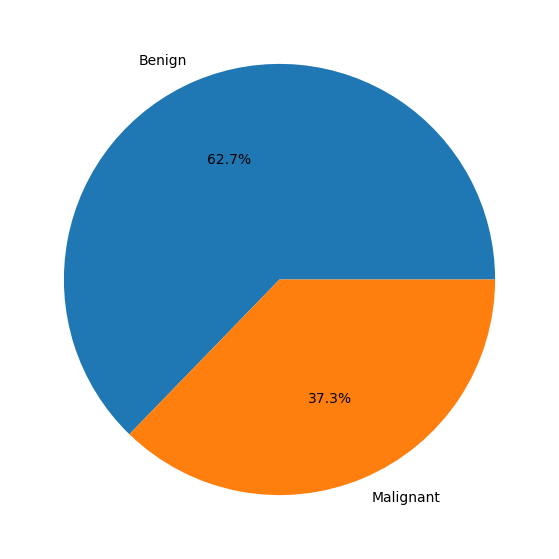

In [11]:
percentage=df["diagnosis"].value_counts(normalize=True)*100
classlabels=["Benign","Malignant"]
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlabels,autopct="%1.1f%%")
plt.show()

In [12]:
X = df.drop('diagnosis', axis=1) # Everything except the answer
y = df['diagnosis']

In [13]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

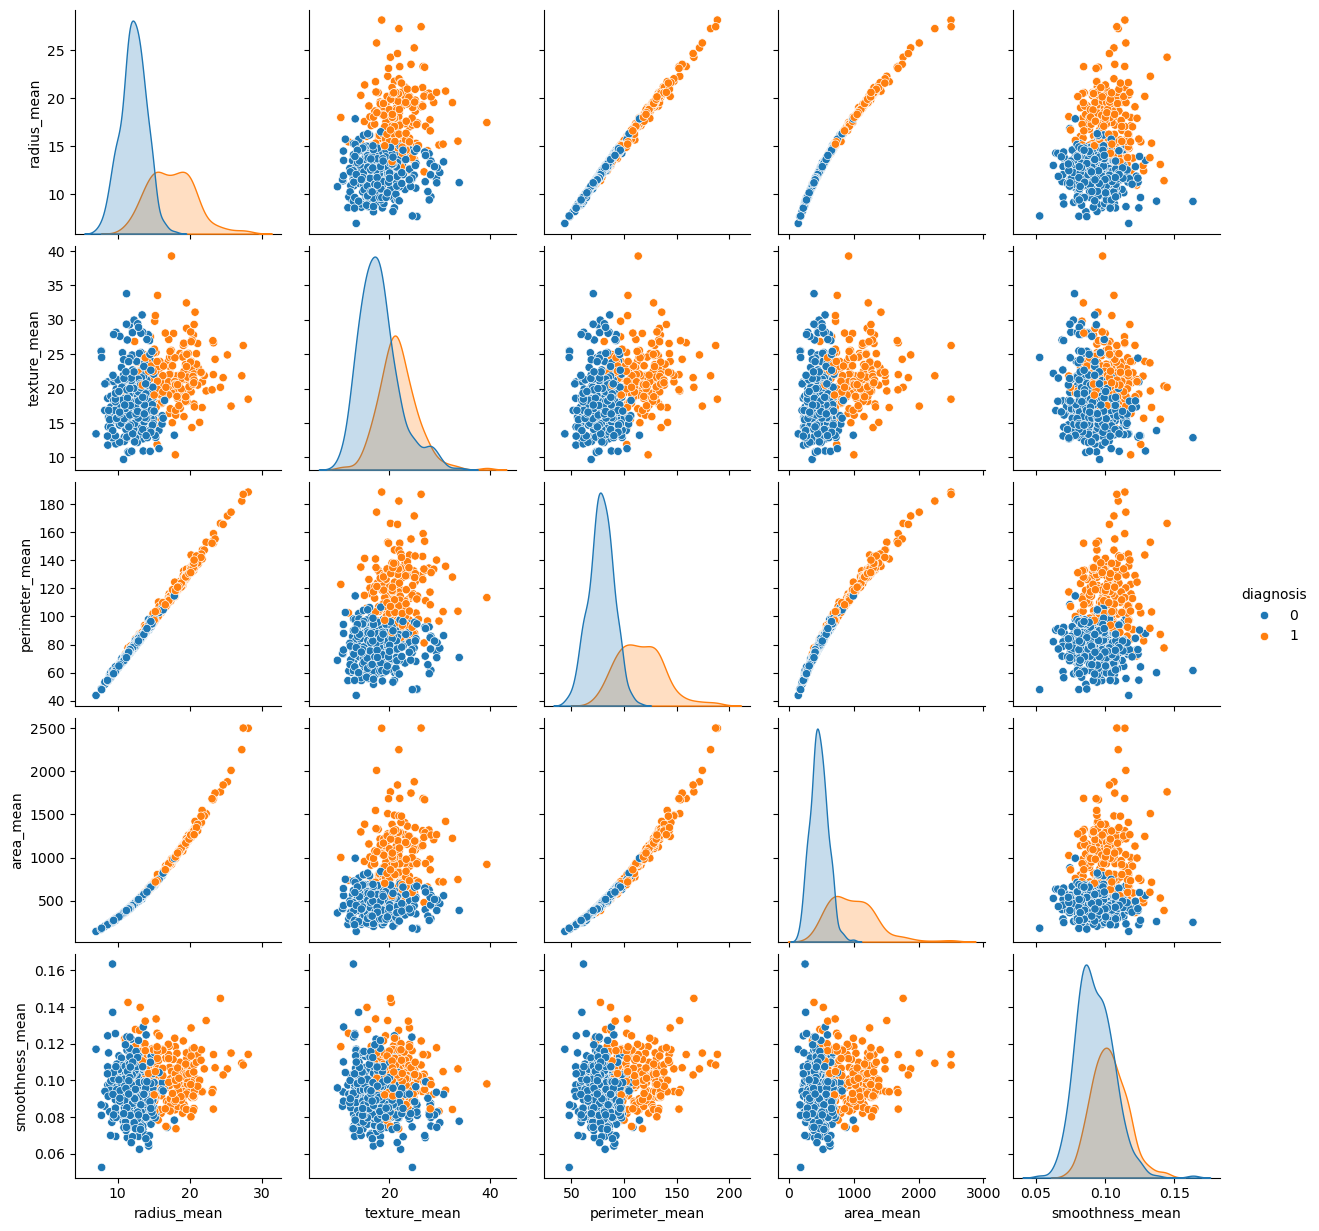

In [16]:
sns.pairplot(df ,hue ="diagnosis", vars =['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean']) 

<Axes: >

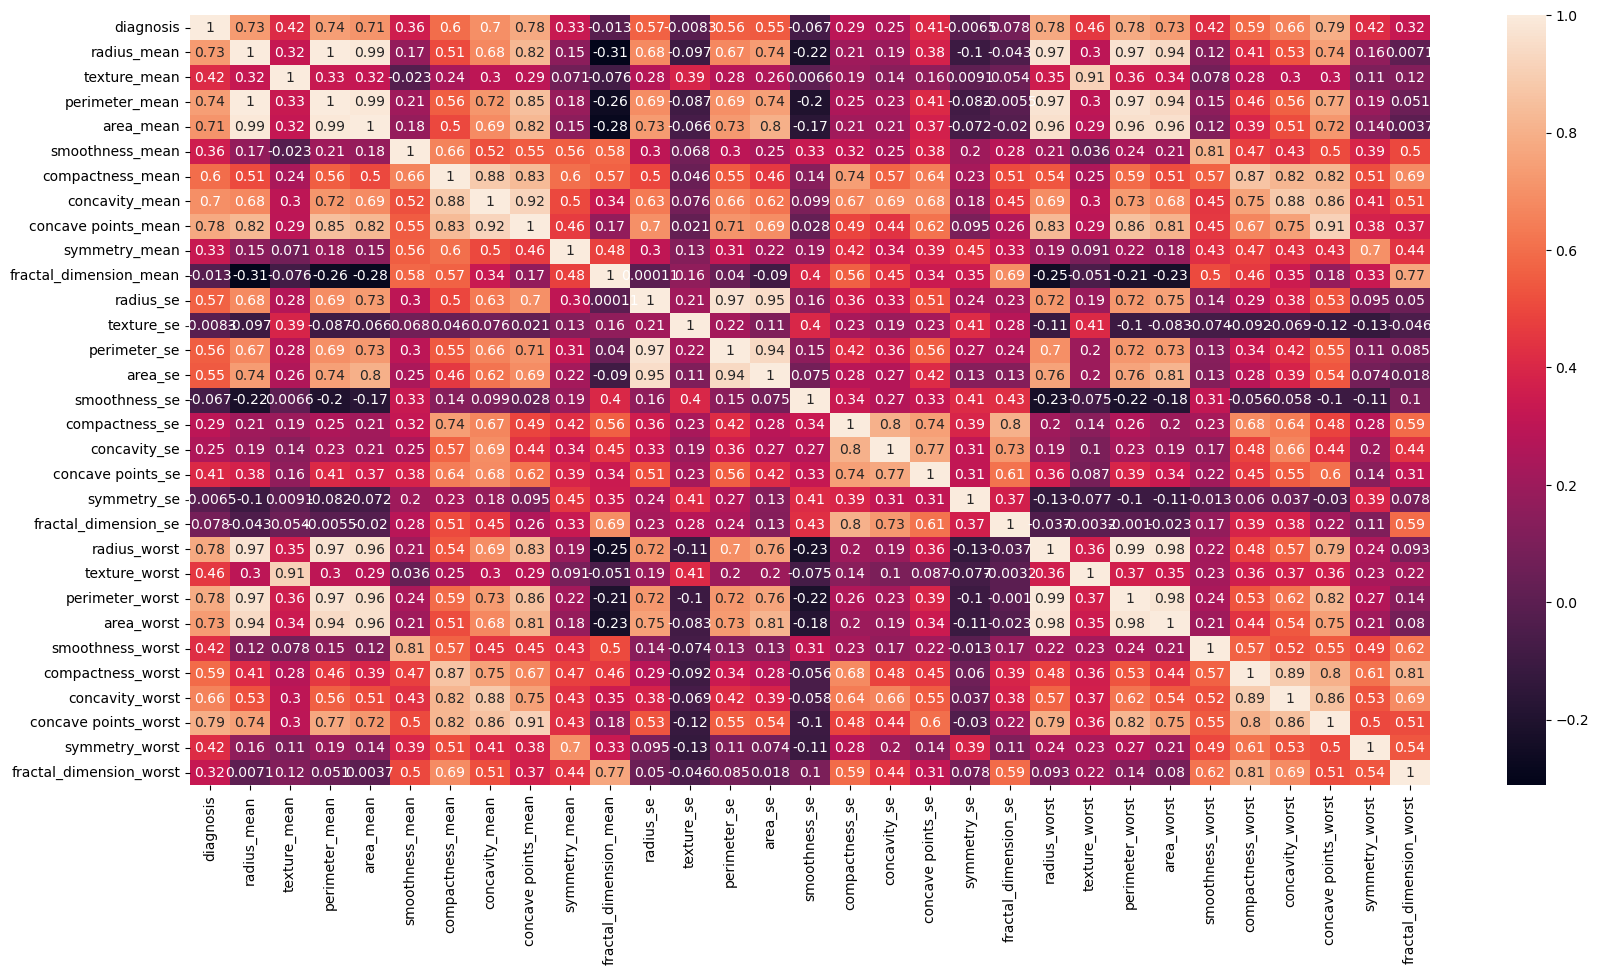

In [17]:
plt.figure(figsize =(20,10))
sns.heatmap(df.corr(), annot =True)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score,classification_report,ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score,roc_curve 

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [16]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
!pip install xgboost

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import XGBClassifier

In [21]:
models={
    
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(kernel='linear'),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}
import warnings

warnings.filterwarnings("ignore")

In [22]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Logistic Regression
Model performance for Training set
- Accuracy: 0.9883
- F1 score: 0.9882
- Precision: 1.0000
- Recall: 0.9688
- Roc Auc Score: 0.9844
----------------------------------
Model performance for Test set
- Accuracy: 0.9580
- F1 score: 0.9582
- Precision: 0.9259
- Recall: 0.9615
- Roc Auc Score: 0.9588


SVM
Model performance for Training set
- Accuracy: 0.9859
- F1 score: 0.9859
- Precision: 0.9936
- Recall: 0.9688
- Roc Auc Score: 0.9825
----------------------------------
Model performance for Test set
- Accuracy: 0.9371
- F1 score: 0.9374
- Precision: 0.8909
- Recall: 0.9423
- Roc Auc Score: 0.9382


KNN
Model performance for Training set
- Accuracy: 0.9671
- F1 score: 0.9669
- Precision: 0.9867
- Recall: 0.9250
- Roc Auc Score: 0.9587
----------------------------------
Model performance for Test set
- Accuracy: 0.9860
- F1 score: 0.9860
- Precision: 1.0000
- Recall: 0.9615
- Roc Auc Score: 0.9808


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
-

Decreasing false negatives and putting forward recall more than the accuracy
 ## Best performers: Random Forest, XGboost , Logistic Regression

## Hyperparameter tuning

In [23]:
rf_params = {"max_depth": [3, 4, 5, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}
xgboost_params={'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'gamma': [0, 0.1, 0.2],
    'scale_pos_weight': [1, 1.5, 2]
}
logistic_params={
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'], 
    'class_weight': [None, 'balanced']
}

In [24]:
randomcv_models = [
                   ("RF", RandomForestClassifier(), rf_params),
                   ("Xgboost",XGBClassifier(),xgboost_params),
                    ("logistic",LogisticRegression(),logistic_params)
                   ]

In [25]:
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [3, 4, 5, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]}),
 ('Xgboost',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                feature_weights=None, gamma=None, grow_policy=None,
                importance_type=None, interaction_constraints=None,
                learning_rate=None, max_bin=None, max_cat_threshold=None,
                max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
                max_leaves=None, min_child_weight=None, missing=nan,
                monotone_constraints=None, multi_strategy=None, n_estimators=None,
                n_jobs=None, num_parallel_tree=None, ...),
  {'n_es

In [26]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 24 candidates, totalling 72 fits
---------------- Best Params for RF -------------------
{'n_estimators': 200, 'min_samples_split': 2, 'max_features': 8, 'max_depth': 10}
---------------- Best Params for Xgboost -------------------
{'scale_pos_weight': 1.5, 'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 0.2}
---------------- Best Params for logistic -------------------
{'solver': 'liblinear', 'penalty': 'l2', 'class_weight': None, 'C': 1}


## After hyperparameter tuning the best models output results

In [28]:
models={
    
    "Random Forest":RandomForestClassifier(n_estimators=1000,min_samples_split=2,
                                max_features=8,max_depth=3),
    "Xgboost":XGBClassifier(scale_pos_weight= 1.5, n_estimators= 50, max_depth=2, learning_rate= 0.2, gamma= 0.2),
    "Logistic Regression" : LogisticRegression(solver= 'liblinear',penalty= 'l2', class_weight= None, C= 1)
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Random Forest
Model performance for Training set
- Accuracy: 0.9718
- F1 score: 0.9716
- Precision: 0.9933
- Recall: 0.9313
- Roc Auc Score: 0.9637
----------------------------------
Model performance for Test set
- Accuracy: 0.9720
- F1 score: 0.9720
- Precision: 0.9615
- Recall: 0.9615
- Roc Auc Score: 0.9698


Xgboost
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9790
- F1 score: 0.9791
- Precision: 0.9455
- Recall: 1.0000
- Roc Auc Score: 0.9835


Logistic Regression
Model performance for Training set
- Accuracy: 0.9883
- F1 score: 0.9882
- Precision: 1.0000
- Recall: 0.9688
- Roc Auc Score: 0.9844
----------------------------------
Model performance for Test set
- Accuracy: 0.9580
- F1 score: 0.9582
- Precision: 0.9259
- Recall: 0.9615
- Roc Auc Score: 0.9588




## Plotting of ROC-AUC curve for Random Forest

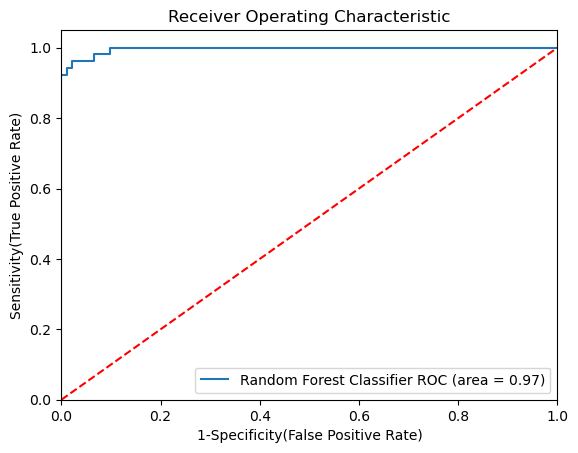

In [29]:
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()
RandomForestClassifier(n_estimators=1000,min_samples_split=2,
                                max_features=8,max_depth=15).fit(X_train,y_train)
# Computing False postive rate, and True positive rate
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculating Area under the curve to display on the plot
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('Random Forest Classifier',0.969))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show() 

In [26]:
rf=RandomForestClassifier(n_estimators=1000,min_samples_split=2,
                                max_features=8,max_depth=3)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, max_features=8, n_estimators=1000)

In [27]:
importances = rf.feature_importances_

In [28]:
top_k = 5
top_indices = np.argsort(importances)[-top_k:]

In [29]:
X_reduced = X.iloc[:, top_indices]
print(X_reduced.shape)

(569, 5)


In [32]:
X_reduced_train,X_reduced_test,y_train,y_test=train_test_split(X_reduced,y,test_size=0.3,random_state=42)
from sklearn.preprocessing import StandardScaler
scaler_final=StandardScaler()
X_reduced_train=scaler_final.fit_transform(X_reduced_train)
X_reduced_test=scaler_final.fit_transform(X_reduced_test)
rf_final=RandomForestClassifier(n_estimators=1000,min_samples_split=2,
                                max_features=8,max_depth=3,random_state=42)
rf_final.fit(X_reduced_train,y_train)

RandomForestClassifier(max_depth=3, max_features=8, n_estimators=1000,
                       random_state=42)

In [33]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred_train=rf_final.predict(X_reduced_train)
y_pred_test=rf_final.predict(X_reduced_test)
print("Accuracy of train data",accuracy_score(y_pred_train,y_train))
print("Accuracy of test data",accuracy_score(y_pred_test,y_test))
print(classification_report(y_pred_train,y_train))
print(classification_report(y_pred_test,y_test))

Accuracy of train data 0.964824120603015
Accuracy of test data 0.9649122807017544
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       257
           1       0.93      0.98      0.95       141

    accuracy                           0.96       398
   macro avg       0.96      0.97      0.96       398
weighted avg       0.97      0.96      0.97       398

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       110
           1       0.94      0.97      0.95        61

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



In [34]:
#my top 5 features
X_reduced.columns

Index(['concave points_mean', 'radius_worst', 'area_worst',
       'concave points_worst', 'perimeter_worst'],
      dtype='object')

In [37]:
import pickle
pickle.dump(scaler_final,open("sc_finall.pkl",'wb'))
pickle.dump(rf_final,open("rf_finall.pkl",'wb'))